# Data Science for Construction, Architecture and Engineering

## Section 4 - Operations - Pandas Statistics and Visualization

### Exercise Set 4.1 - Pandas Stats and Viz I

This set of exercises is related to the first half of Section 4 videos. Using the same data (ASHRAE Thermal Comfort Database II) and packages (Pandas) as in the videos, we learned how to use `groupby`, `pivot_table` and basic plots, and applied these techniques in the thermal comfort database.

There is an introduction video available to explain the process of using this exercise video.

The lead developer of this exercise is Chun Fu, a Ph.D. student at NUS and a teaching assistant of this course. 


#### Setup the environment

Let's set up the environment and read the data first:

In [1]:
# Import packages
import pandas as pd
from google.colab import drive
import os
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Set path for data source
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/4 - Operations - Statistics and Visualization/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# Load thermal comfort database
ieq_data = pd.read_csv("ashrae_thermal_comfort_database_2.csv", index_col='Unnamed: 0')

Among the parameters (or columns) of this database, **Air temperature (C)** is an essential parameter for evaluating a thermal environment, which could be affected by many factors, such as weather or air conditioning. So, in the following example and exercises, you will be asked questions about **Air temperature (C)**.

For example (as shown in the graph below), we can observe that the **Air temperature (C)** has significantly different distributions (based on the `boxplots`) under different cooling strategies. A simple take away could be that **Air temperature (C)** in **naturally ventilated** environments are higher, on average, than **air conditioned** ones, which means that naturally ventilated environments are, on average, warmer (at least according to the database).

Air Conditioned                 AxesSubplot(0.1,0.559091;0.363636x0.340909)
Mechanically Ventilated    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Mixed Mode                          AxesSubplot(0.1,0.15;0.363636x0.340909)
Naturally Ventilated           AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

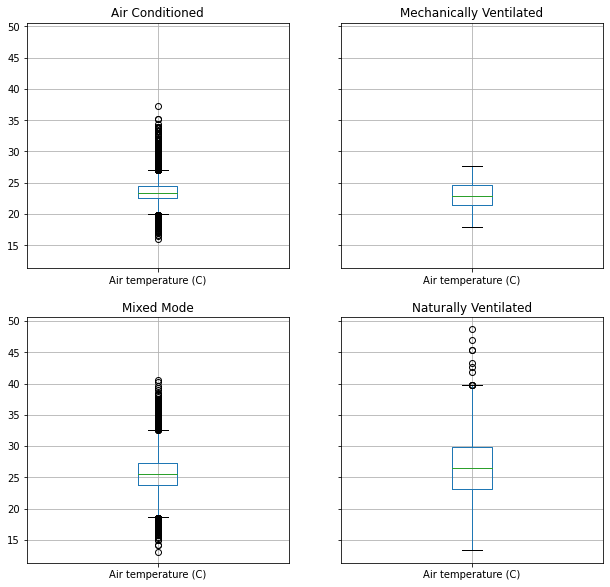

In [4]:
# Boxplot for Thermal sensation under different cooling strategies
ieq_data[['Air temperature (C)','Cooling startegy_building level']].groupby('Cooling startegy_building level').boxplot(figsize=(10,10))

## Exercise 04.1.1 - Draw a boxplot for each building type

In this first exercise, you are asked to do a similar analysis of the data from the ASHRAE Thermal Comfort Database II to understand the different distributions of **Air temperature (C)** for each **building type** by using boxplots for analysis.

By looking at the **Air temperature (C)** `median` of each **building type**. What is their order, if we were to sort them from high to low?

The correct answer is one of the following choices:
1. Multifamily housing > Senior center > Classroom > Office > Others 
2. Multifamily housing > Senior center > Office > Others > Classroom
3. Multifamily housing > Classroom > Office > Others > Senior center
4. Classroom > Multifamily housing > Senior center > Office > Others

Have in mind that `median` is represented as the middle line of the box body in the boxplot figure.

In [5]:
ieq_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43448 entries, 2233 to 104033
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Publication (Citation)           43448 non-null  object 
 1   Year                             43448 non-null  float64
 2   Season                           43448 non-null  object 
 3   Climate                          43448 non-null  object 
 4   City                             43448 non-null  object 
 5   Country                          43448 non-null  object 
 6   Building type                    43448 non-null  object 
 7   Cooling startegy_building level  43448 non-null  object 
 8   Sex                              43448 non-null  object 
 9   Thermal sensation                43448 non-null  float64
 10  Clo                              43448 non-null  float64
 11  Met                              43448 non-null  float64
 12  Air temperatur

Classroom                   AxesSubplot(0.1,0.679412;0.363636x0.220588)
Multifamily housing    AxesSubplot(0.536364,0.679412;0.363636x0.220588)
Office                      AxesSubplot(0.1,0.414706;0.363636x0.220588)
Others                 AxesSubplot(0.536364,0.414706;0.363636x0.220588)
Senior center                   AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

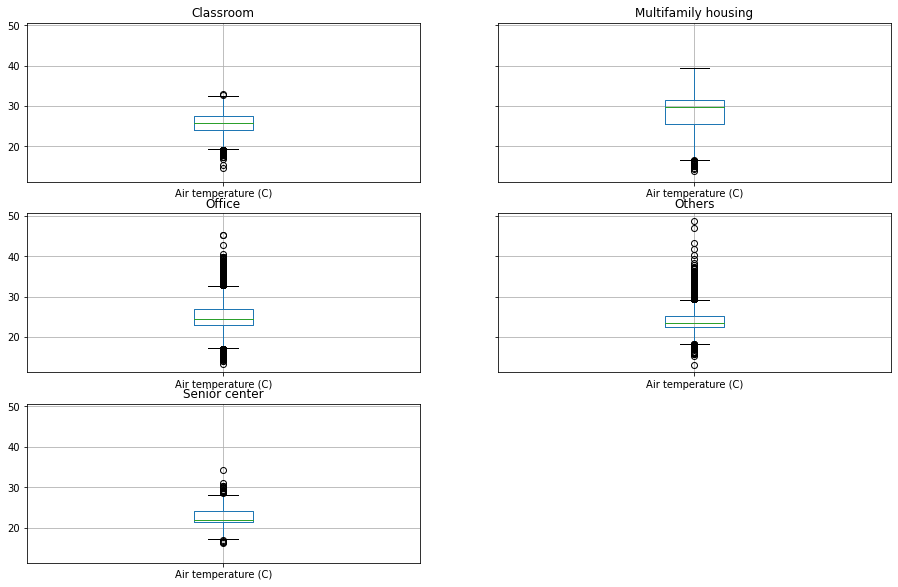

In [6]:
# Boxplot for "Air temperature (C)" under different building types
# YOUR CODE HERE
ieq_data[['Air temperature (C)', 'Building type']].groupby('Building type').boxplot(figsize=(15,10))

In [7]:
ieq_data[['Air temperature (C)', 'Building type']].groupby('Building type').median().sort_values(by='Air temperature (C)', ascending=False)

Air temperature (C)
Building type                           
Multifamily housing                 29.8
Classroom                           25.8
Office                              24.5
Others                              23.5
Senior center                       22.0

## Exercise 04.1.2 - Finding the median values for each building type

From the question above, we successfully compared different distributions and medians for each **building type**!

Sometimes, instead of a distribution comparison, we want to boil down the data to a single number, such as the **average** or **median**.

In this exercise, write code that finds the `median` values of all quantitative columns in the `ieq_data` DataFrame for each of the **building type** (Office, Multifamily housing, Classroom, Senior center, and Others)

Regarding  **Air temperature (C)**, try to find the maximum value in the median of each **building type** (For example, the **building type A** has the highest median value of **Air temperature (C)**, then this value is the answer).



In [8]:
# There is a Pandas function that enables you to do this in a *single line of code*
# YOUR CODE HERE 
bldg_type_median = ieq_data.groupby('Building type').agg('median')
bldg_type_median

Year  ...  ThermalSensation_rounded
Building type                ...                          
Classroom            2010.0  ...                       0.0
Multifamily housing  2011.0  ...                       0.0
Office               2010.0  ...                       0.0
Others               1998.0  ...                       0.0
Senior center        2016.0  ...                       0.0

[5 rows x 8 columns]

In [ ]:
bldg_type_median['Air temperature (C)'].idxmax()

'Multifamily housing'

## Exercise 04.1.3 - Calculate heat index and find the lowest average value - Advanced

The previous two questions look at only one parameter, **Air temperature (C)**, in our analysis -- what if we're interested in a more comprehensive index for evaluating thermal environment?

 **Heat index** , which includes both **Air temperature (C)** and **Relative humidity (%)** is a metric that simulates the real temperature people feel (e.g, higher humidity would make people feel warmer). 

In this exercise, try first to calculate the heat index based on **Air temperature (C)** and **Relative humidity (%)**, then work out the **average heat index** for each **Cooling startegy_building level** in each **Building type** (rounded to two decimal places). Finally, provide the **lowest** value among them as your answer (e.g., the lowest value **xx.xx** may come from **Cooling startegy_building level A** in **Building type B**).


Here is a short introduction of **heat index**:

The **heat index**, also known as the apparent temperature, is an index that combines **air temperature** and **relative humidity** to reflect what the temperature feels like to the human body. For example, people usually feel warmer under higher humidity, even at the same temperature.

The **heat index** is calculated from the following formula:

$\displaystyle \mathrm {HI} =c_{1}+c_{2}T+c_{3}R+c_{4}TR+c_{5}T^{2}+c_{6}R^{2}+c_{7}T^{2}R+c_{8}TR^{2}+c_{9}T^{2}R^{2}$

where
- HI = heat index (in degrees Celsius)
- T = ambient dry-bulb temperature (in degrees Celsius)
- R = relative humidity (percentage value between 0 and 100)
- c1 = -8.78469475556
- c2 = 1.61139411
- c3 = 2.33854883889
- c4 = -0.14611605
- c5 = -0.012308094
- c6 = -0.0164248277778
- c7 = 0.002211732
- c8 = 0.00072546
- c9 = -0.000003582

Here's an example for calculating heat index from `Air temperature (C)` (28 degC) and `Relative humidity (%)` (90%):

$\displaystyle \mathrm {T} = 28$

$\displaystyle \mathrm {R} = 90$

$\displaystyle \mathrm {HI} =c_{1}+c_{2}T+c_{3}R+c_{4}TR+c_{5}T^{2}+c_{6}R^{2}+c_{7}T^{2}R+c_{8}TR^{2}+c_{9}T^{2}R^{2}=33.75$

In [12]:
def heat_index(T,R):
    HI = -8.78469475556 + T*1.61139411 + R*2.33854883889 + T*R*-0.14611605 + (T**2)*-0.012308094 + (R**2)*-0.0164248277778 + (T**2)*R*0.002211732 + (R**2)*T*0.00072546 + (T**2)*(R**2)*-0.000003582
    return round(HI,2)

In [25]:
heat_index(28,90)

33.75

In [ ]:
# Calculate heat index and assign to a new column 'HI'
# YOUR CODE HERE
ieq_data['HI'] = ieq_data.apply(lambda x: heat_index(x['Air temperature (C)'], x['Relative humidity (%)']), axis=1)

In [28]:
# Use groupby() or pivot_table() function aggregated by mean(), and find the lowest value among aggregated values
# YOUR CODE HERE
HI_by_bldg = ieq_data[['Cooling startegy_building level', 'Building type', 'HI']].groupby(by=['Cooling startegy_building level', 'Building type']).mean()
HI_by_bldg

HI
Cooling startegy_building level Building type                 
Air Conditioned                 Classroom            26.347044
                                Office               25.385533
                                Others               25.129186
Mechanically Ventilated         Office               25.267008
                                Others               25.184211
Mixed Mode                      Classroom            27.423613
                                Multifamily housing  32.308638
                                Office               27.201408
                                Others               26.275149
                                Senior center        25.525697
Naturally Ventilated            Classroom            27.778912
                                Multifamily housing  32.167788
                                Office               28.912413
                                Others               26.328268

In [29]:
HI_by_bldg.HI.idxmin()

('Air Conditioned', 'Others')

### **Please note that you will need to use the resultant output (a two-digit value with two decimal places) from Exercise 04.1.3 for the Quiz 4.1.**